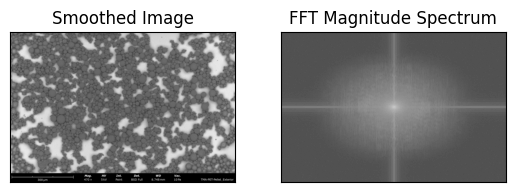

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/workspaces/Python_Physics/Images/PDVB Butanol 4% wt to vol (3).jpeg', 0)  # Update path accordingly


# Apply Gaussian blur to smooth the image
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Perform FFT on the smoothed image
f = np.fft.fft2(smoothed_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the smoothed image and FFT
plt.subplot(121), plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


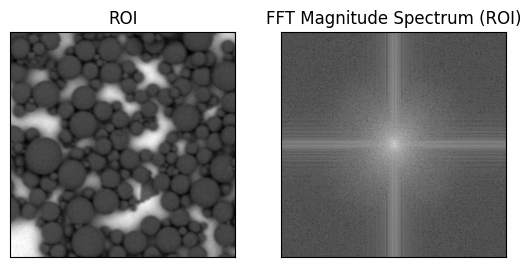

In [4]:
# Crop a region of interest (ROI) from the image
roi = smoothed_image[300:700, 300:700]  # Adjust this depending on the area you want to analyze

# Perform FFT on the ROI
f_roi = np.fft.fft2(roi)
fshift_roi = np.fft.fftshift(f_roi)
magnitude_spectrum_roi = 20 * np.log(np.abs(fshift_roi))

# Display the ROI and its FFT
plt.subplot(121), plt.imshow(roi, cmap='gray')
plt.title('ROI'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_roi, cmap='gray')
plt.title('FFT Magnitude Spectrum (ROI)'), plt.xticks([]), plt.yticks([])
plt.show()
